In [721]:
!pip install scikit-learn


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [722]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import seaborn as sns


In [723]:
# Récupérer les données
raw_data = pd.read_csv("input/features.csv")

# raw_data = pd.merge(data1, data2, on=['city', 'year', 'weekofyear'], how='left') // merge dataframes

In [724]:
# Drop des features inutiles
data = raw_data.drop(columns=[
    "respondent_id",
    "hhs_geo_region",
    "employment_industry",
    "employment_occupation",
    "employment_status",
    "income_poverty",
    "sex",
    "race",
    "marital_status",
    "rent_or_own",
    "census_msa",],
    axis=1)

# Afficher les 5 premières lignes
data.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,household_adults,household_children
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,0.0,0.0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,0.0,0.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,2.0,0.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,0.0,0.0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,1.0,0.0


In [725]:
# convertir les colonnes
# object_columns = data.describe(include="object").columns
data_copy = data.copy()

def convert_cols(data, colums, enums, type=float):
    for x in range(len(colums)):
        data[colums[x]] = data[colums[x]].replace(enums[x]).astype(type)
    return data

data_copy = convert_cols(data_copy, ["age_group", "education"], [
    {
         "18 - 34 Years": "1.0",
        "35 - 44 Years": "2.0",
        "45 - 54 Years": "3.0",
        "55 - 64 Years": "4.0",
        "65+ Years": "5.0"
    },
    {
          "< 12 Years": "1.0",
        "12 Years": "2.0",
        "College Graduate": "3.0",
        "Some College": "4.0"
    }
])

# data_copy["week_start_date"] = pd.to_datetime(data_copy["week_start_date"])   // to convert to timestamp

data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker   

In [726]:
# Définir y et X
X = data_copy.drop(["h1n1_concern"], axis=1)
y = data_copy["h1n1_concern"]
y = y.fillna(0)


In [727]:
# Info sur les données
print(X.shape)
X.info()
X.describe()

(26707, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_knowledge               26591 non-null  float64
 1   behavioral_antiviral_meds    26636 non-null  float64
 2   behavioral_avoidance         26499 non-null  float64
 3   behavioral_face_mask         26688 non-null  float64
 4   behavioral_wash_hands        26665 non-null  float64
 5   behavioral_large_gatherings  26620 non-null  float64
 6   behavioral_outside_home      26625 non-null  float64
 7   behavioral_touch_face        26579 non-null  float64
 8   doctor_recc_h1n1             24547 non-null  float64
 9   doctor_recc_seasonal         24547 non-null  float64
 10  chronic_med_condition        25736 non-null  float64
 11  child_under_6_months         25887 non-null  float64
 12  health_worker                25903 non-null  float64
 13  heal

,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,...,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,household_adults,household_children
count,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,24547.000000,24547.000000,...,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26707.000000,25300.000000,26458.000000,26458.000000
mean,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.220312,0.329735,...,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,3.186131,2.862451,0.886499,0.534583
std,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.414466,0.470126,...,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,1.457320,0.928559,0.753422,0.928173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,2.000000,2.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,...,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,3.000000,3.000000,1.000000,0.000000
75%,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,1.000000,...,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,1.000000
max,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,3.000000,3.000000


In [728]:
# Detection des valeurs manquantes

# nombre de valeurs manquantes
print(X.isnull().sum().sort_values(ascending=False))
# Proportion de valeurs manquantes
X.isnull().mean().sort_values(ascending=False)


health_insurance               12274
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
education                       1407
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
opinion_seas_sick_from_vacc      537
opinion_seas_risk                514
opinion_seas_vacc_effective      462
opinion_h1n1_sick_from_vacc      395
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
household_adults                 249
household_children               249
behavioral_avoidance             208
behavioral_touch_face            128
h1n1_knowledge                   116
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_antiviral_meds         71
behavioral_wash_hands             42
behavioral_face_mask              19
age_group                          0
dtype: int64


health_insurance               0.459580
doctor_recc_h1n1               0.080878
doctor_recc_seasonal           0.080878
education                      0.052683
chronic_med_condition          0.036358
child_under_6_months           0.030704
health_worker                  0.030104
opinion_seas_sick_from_vacc    0.020107
opinion_seas_risk              0.019246
opinion_seas_vacc_effective    0.017299
opinion_h1n1_sick_from_vacc    0.014790
opinion_h1n1_vacc_effective    0.014640
opinion_h1n1_risk              0.014528
household_adults               0.009323
household_children             0.009323
behavioral_avoidance           0.007788
behavioral_touch_face          0.004793
h1n1_knowledge                 0.004343
behavioral_large_gatherings    0.003258
behavioral_outside_home        0.003070
behavioral_antiviral_meds      0.002658
behavioral_wash_hands          0.001573
behavioral_face_mask           0.000711
age_group                      0.000000
dtype: float64

In [729]:
# # 0 pour supprimer toutes les lignes contenant des valeurs manquantes
# data_supp_lignes = data_copy.dropna(axis=0)

# print(data_supp_lignes.shape)

# 1 pour supprimer les colonnes contenant des valeurs manquantes

# data_supp_col = data_copy.dropna(axis=1)

# print(data_supp_col.shape)

# Remplacer les valeurs manquantes par la moyenne, le mode ou la médiane
X = X.fillna(X.mean())


In [730]:
X.head()
corr = X.corr()

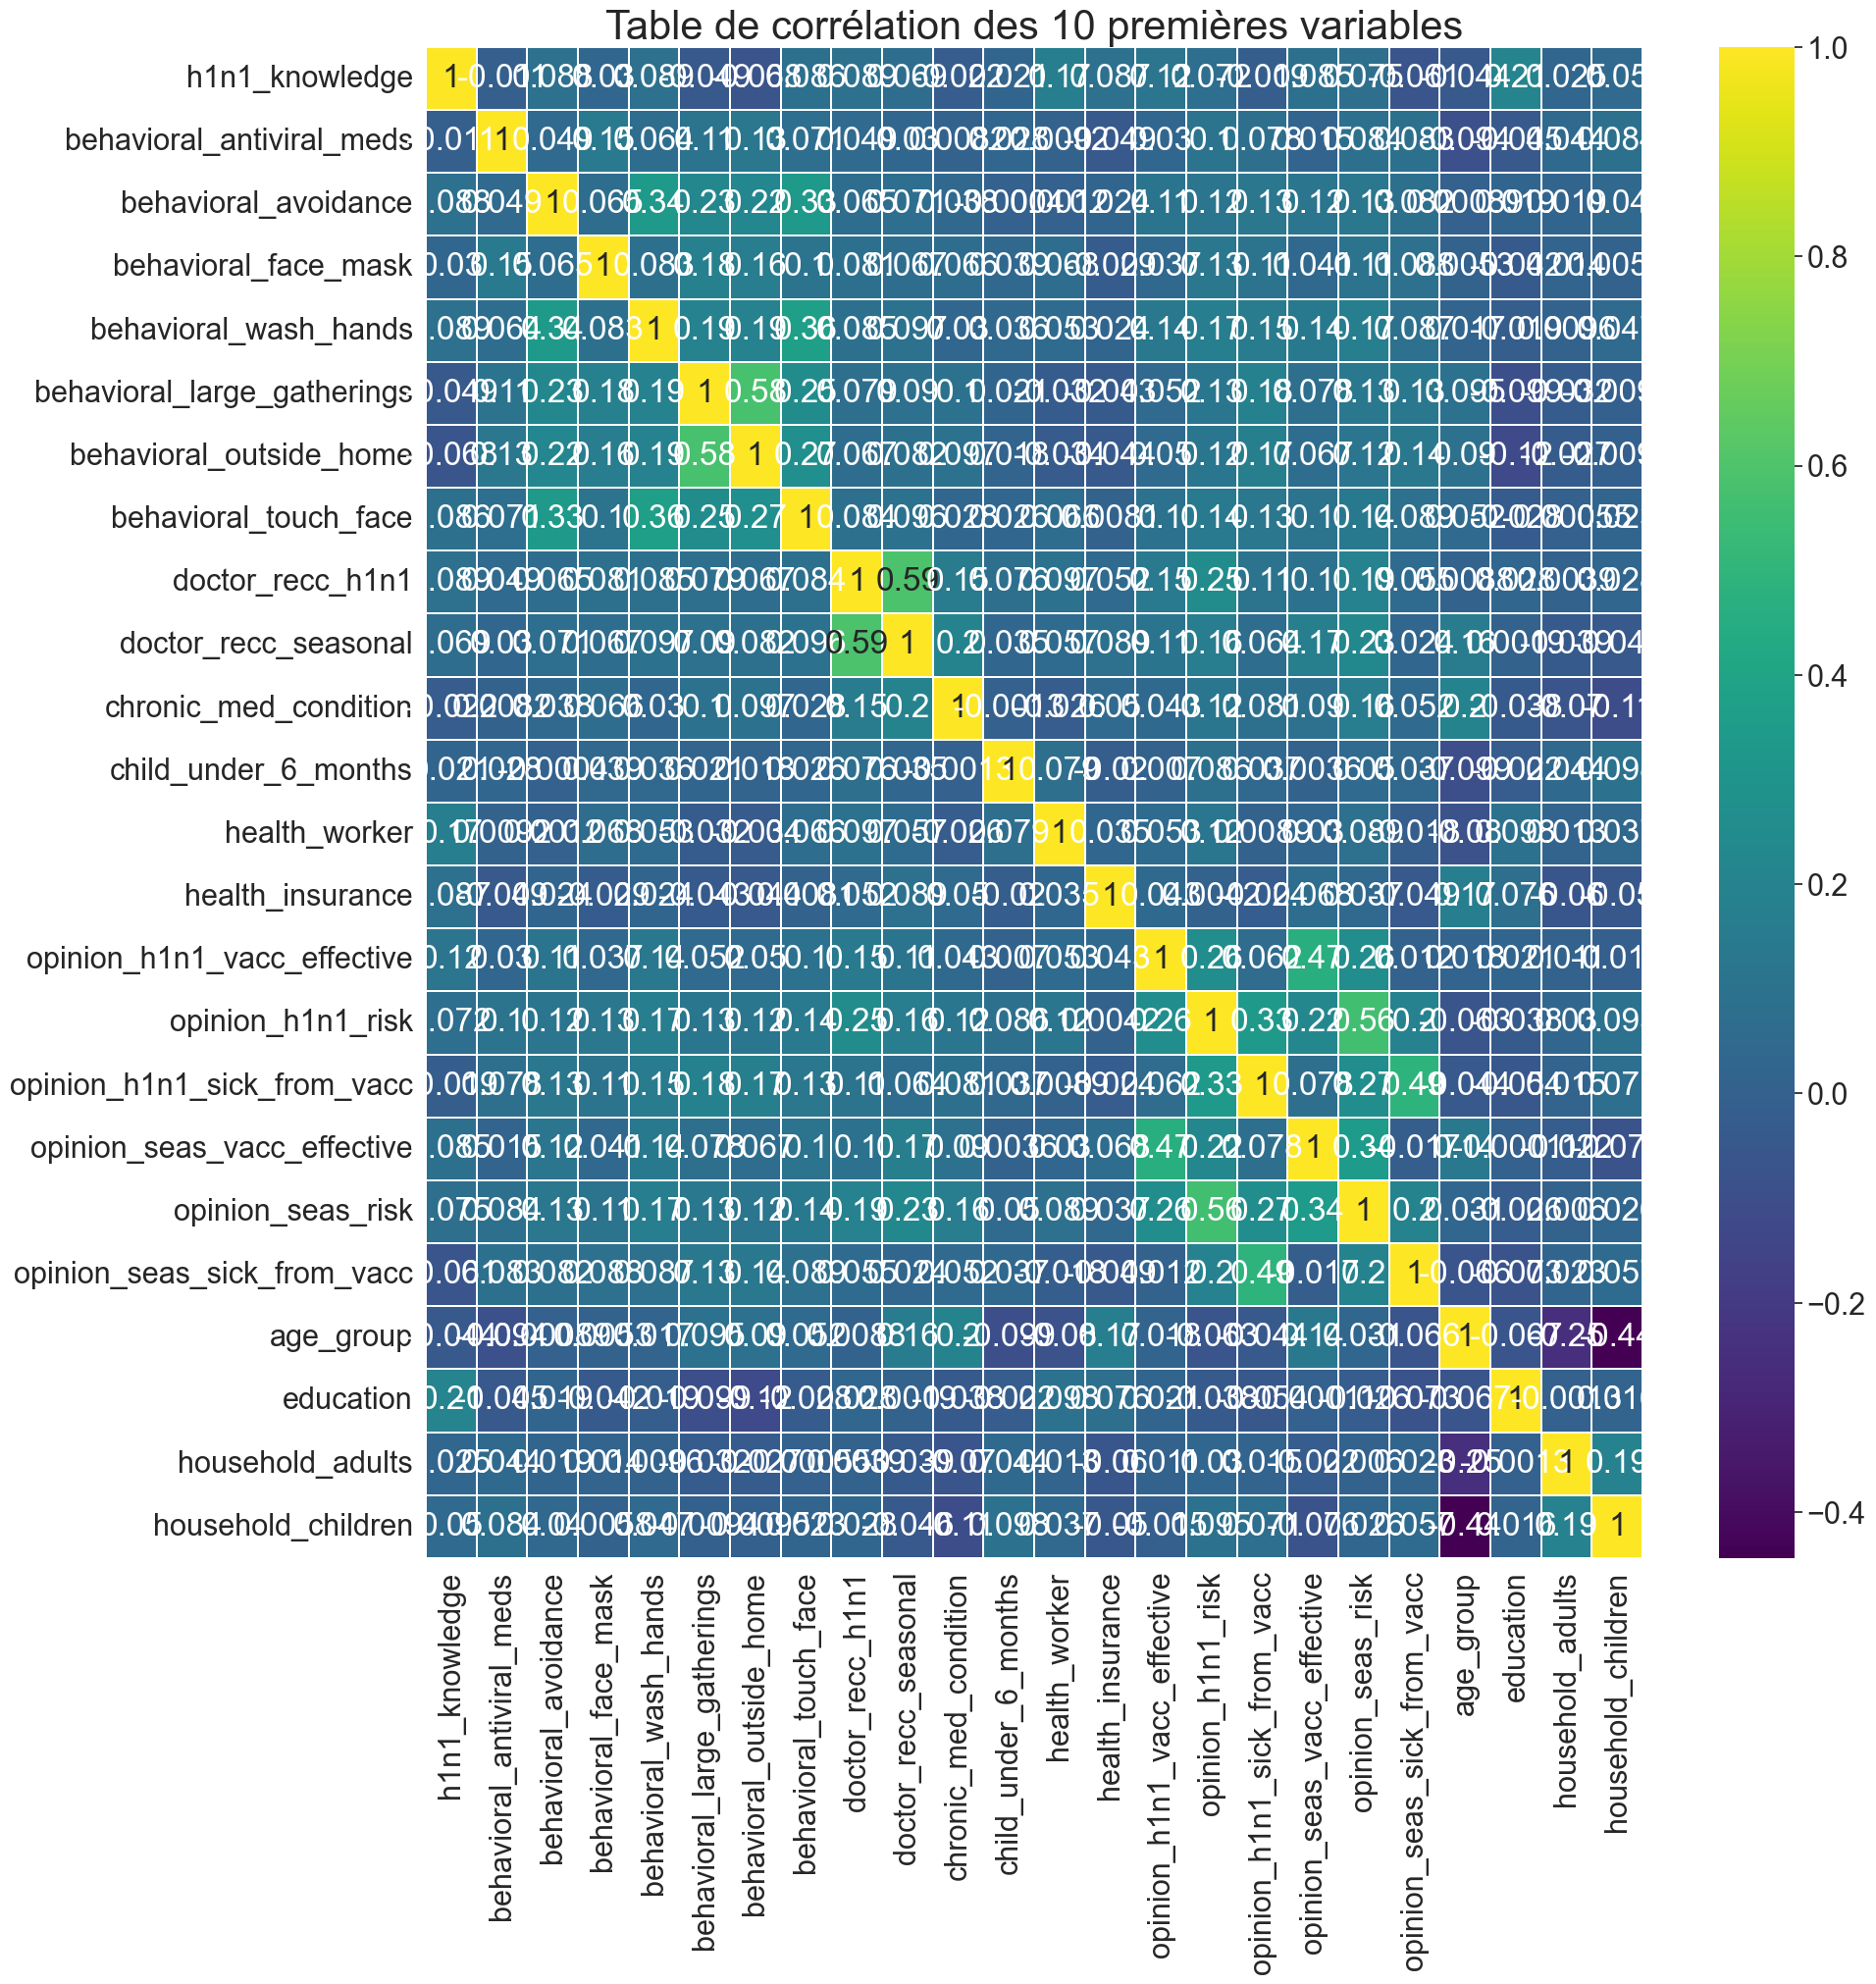

In [731]:
# graphique des correlations
plt.figure(figsize=(20, 20))

plt.title("Table de corrélation des 10 premières variables", fontsize=30)

sns.set(style="darkgrid", font_scale=2)
plt.xlabel("",fontsize=20)
plt.ylabel("",fontsize=20)

sns.heatmap(corr,
            cmap='viridis',
            cbar=True,
            #vmax=1.0, vmin=-1.0,
            linewidths=0.3,
            annot=True,
            #annot_kws={"size": 8}, square=True
           );

In [732]:
X.describe()

,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,...,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,household_adults,household_children
count,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,...,26707.000000,26707.000000,26707.00000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000
mean,1.262532,0.048844,0.725612,0.068982,0.825614,0.358640,0.337315,0.677264,0.220312,0.329735,...,3.850623,2.342566,2.35767,4.025986,2.719162,2.118112,3.186131,2.862451,0.886499,0.534583
std,0.616805,0.215258,0.444473,0.253339,0.379150,0.478828,0.472076,0.466410,0.397351,0.450713,...,1.000034,1.276167,1.35265,1.077125,1.371662,1.319480,1.457320,0.903767,0.749901,0.923836
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.000000,1.000000,1.00000,4.000000,2.000000,1.000000,2.000000,2.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,4.000000,2.000000,2.00000,4.000000,2.000000,2.000000,3.000000,3.000000,1.000000,0.000000
75%,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.220312,1.000000,...,5.000000,4.000000,4.00000,5.000000,4.000000,2.118112,5.000000,4.000000,1.000000,1.000000
max,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,4.000000,3.000000,3.000000


# Split des donnees Train et Test

In [733]:
from sklearn.model_selection import train_test_split

X.shape

(26707, 24)

In [734]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

print('X_Train set:', X_train.shape)
print('X_Test set:', X_test.shape)
print('yTest set:', y_test.shape)
print('yTrain set:', y_train.shape)

X_Train set: (21365, 24)
X_Test set: (5342, 24)
yTest set: (5342,)
yTrain set: (21365,)


### Visualisation du Train et Test

Text(0.5, 1.0, 'Test set')

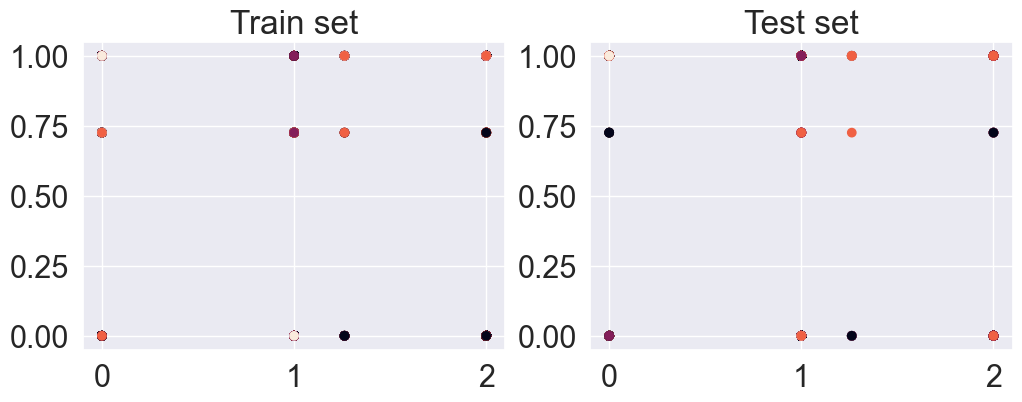

In [735]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.scatter(X_train["h1n1_knowledge"], X_train["behavioral_avoidance"], c=y_train)
plt.title('Train set')
plt.subplot(122)
plt.scatter(X_test["h1n1_knowledge"], X_test["behavioral_avoidance"],c=y_test)
plt.title('Test set')

## 1. KNN classification

In [736]:
from sklearn.neighbors import KNeighborsClassifier

# déclaration de l'intention de knn
knn = KNeighborsClassifier(n_neighbors=49)

# Entrainement du modèle


# Calcul de score

# print('train score:', knn.score(X_train, y_train))
# print('test score:', knn.score(X_test, y_test))

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=49)

In [737]:
# Calcul de score

print('train score:', knn.score(X_train, y_train))
print('test score:', knn.score(X_test, y_test))

train score: 0.5221156096419377
test score: 0.5084238113066267


### Matrice de confusion

In [738]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report

y_test_predit = knn.predict(X_test)

confusion_matrix(y_test, y_test_predit)

array([[ 142,  329,  171,    9],
       [  80,  815,  706,   21],
       [  29,  498, 1557,   64],
       [  11,  100,  608,  202]])

In [739]:
y_pd = pd.DataFrame({'modalites':y})
y_pd['modalites'].value_counts()


2.0    10575
1.0     8153
3.0     4591
0.0     3388
Name: modalites, dtype: int64

In [740]:
ytrain_pd = pd.DataFrame({'modalites':y_train})
ytrain_pd['modalites'].value_counts()

2.0    8427
1.0    6531
3.0    3670
0.0    2737
Name: modalites, dtype: int64

In [741]:
ytest_pd = pd.DataFrame({'modalites':y_test})
ytest_pd['modalites'].value_counts()

2.0    2148
1.0    1622
3.0     921
0.0     651
Name: modalites, dtype: int64

In [742]:
y_test_predit_pd = pd.DataFrame({'modalites':y_test_predit})
y_test_predit_pd['modalites'].value_counts()

2.0    3042
1.0    1742
3.0     296
0.0     262
Name: modalites, dtype: int64

In [743]:
# accuracy : vrai positif + vrai negatif/total

In [744]:
# calcul de la précision, du rappel et du F-score
print(classification_report(y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.54      0.22      0.31       651
         1.0       0.47      0.50      0.48      1622
         2.0       0.51      0.72      0.60      2148
         3.0       0.68      0.22      0.33       921

    accuracy                           0.51      5342
   macro avg       0.55      0.42      0.43      5342
weighted avg       0.53      0.51      0.48      5342



### Cross Validation

In [745]:
from sklearn.model_selection import cross_val_score

#### Validation croisée

In [746]:
cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')


array([0.49216007, 0.5008191 , 0.49520243, 0.49754271, 0.50105312])

In [747]:
cross_val_score(knn, X_test, y_test, cv=5, scoring='accuracy')

array([0.50982226, 0.47895229, 0.48033708, 0.49438202, 0.49344569])

In [748]:
cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy').mean()

0.49735548794757783

In [749]:
cross_val_score(knn, X_test, y_test, cv=5, scoring='accuracy').mean()

0.49138786993339706

In [750]:
# => Le score moyen sur les 5 échantillons est de ??

## Courbe d'apprentissage

In [751]:
from sklearn.model_selection import learning_curve

In [752]:
N, train_score, val_score = learning_curve(knn, X_train, y_train, train_sizes=np.linspace(0.1, 1, 10), cv=5)

In [753]:
np.linspace(0.1, 1, 10)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [754]:
N

array([ 1709,  3418,  5127,  6836,  8546, 10255, 11964, 13673, 15382,
       17092])

In [755]:
val_score

array([[0.47320384, 0.47718231, 0.45869413, 0.47718231, 0.46688509],
       [0.48584133, 0.4898198 , 0.474608  , 0.48420314, 0.48069272],
       [0.48233092, 0.48513925, 0.48326703, 0.48747952, 0.49216007],
       [0.48513925, 0.49145799, 0.47952258, 0.48911772, 0.49847882],
       [0.48513925, 0.49333021, 0.48116078, 0.49379827, 0.49496841],
       [0.49216007, 0.4940323 , 0.47437398, 0.49543646, 0.49543646],
       [0.49098994, 0.49473438, 0.48607536, 0.49847882, 0.4940323 ],
       [0.4923941 , 0.49473438, 0.49028785, 0.49777674, 0.4940323 ],
       [0.49052188, 0.50035104, 0.48724549, 0.49052188, 0.49988299],
       [0.49216007, 0.5008191 , 0.49520243, 0.49754271, 0.50105312]])

In [756]:
train_score

array([[0.51316559, 0.50321826, 0.50321826, 0.50321826, 0.50321826],
       [0.51111761, 0.51550614, 0.51550614, 0.51550614, 0.51550614],
       [0.50399844, 0.50984981, 0.50867954, 0.50867954, 0.50867954],
       [0.51316559, 0.50921592, 0.5187244 , 0.5187244 , 0.5187244 ],
       [0.51415867, 0.51684999, 0.51731804, 0.51977533, 0.51977533],
       [0.51867382, 0.51477328, 0.51896636, 0.5185763 , 0.5185763 ],
       [0.52006018, 0.51696757, 0.51889   , 0.51554664, 0.51554664],
       [0.51905215, 0.51715059, 0.51590726, 0.51905215, 0.51700432],
       [0.52171369, 0.52158367, 0.51917826, 0.52197374, 0.52255884],
       [0.52188158, 0.5177861 , 0.52176457, 0.51924877, 0.5203019 ]])

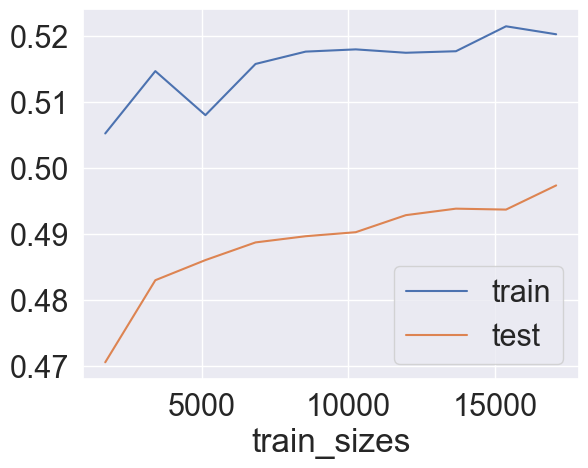

In [757]:
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='test')
plt.xlabel('train_sizes')
plt.legend()

### Determiner le K optimal

Le K optimal est : 49


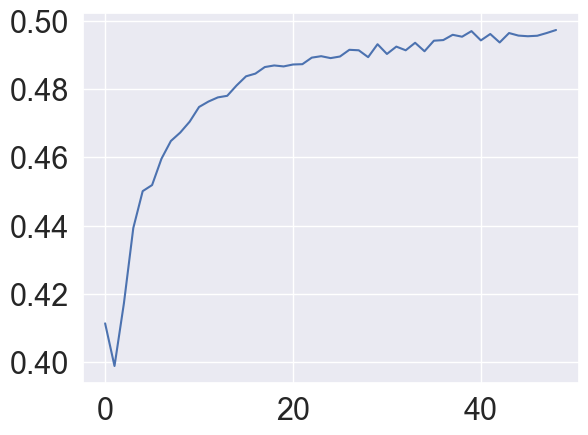

In [758]:
val_score = []
for k in range(1, 50):
    score = cross_val_score(KNeighborsClassifier(k), X_train, y_train, cv=5).mean()
    val_score.append(score)

plt.plot(val_score)

# Trouver le K optimal
best_k = np.argmax(val_score) + 1
print("Le K optimal est :", best_k)

## 2. Forêt aléatoire classification

In [759]:
from sklearn.ensemble import RandomForestClassifier

In [760]:
rf = RandomForestClassifier(random_state=0)

In [761]:
# Entrainement du modèle
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [762]:
# Calcul de score

print('train score:', rf.score(X_train, y_train))
print('test score:', rf.score(X_test, y_test))

train score: 0.9965831968172244
test score: 0.5089853987270685


In [763]:
y_test_rf_predit = rf.predict(X_test)

confusion_matrix(y_test, y_test_rf_predit)

array([[ 210,  285,  130,   26],
       [ 147,  761,  658,   56],
       [  65,  485, 1410,  188],
       [  18,   98,  467,  338]])

In [764]:
# calcul de la précision, du rappel et du F-score
print(classification_report(y_test, y_test_rf_predit))

              precision    recall  f1-score   support

         0.0       0.48      0.32      0.38       651
         1.0       0.47      0.47      0.47      1622
         2.0       0.53      0.66      0.59      2148
         3.0       0.56      0.37      0.44       921

    accuracy                           0.51      5342
   macro avg       0.51      0.45      0.47      5342
weighted avg       0.51      0.51      0.50      5342



In [765]:
N_rf, train_score_rf, val_score_rf = learning_curve(rf, X_train, y_train, 
                                                    train_sizes=np.linspace(0.1, 1, 10),
                                                    cv=5, scoring='accuracy')

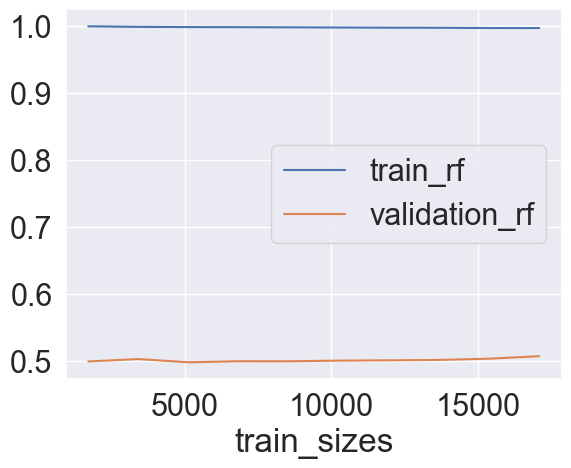

In [766]:
plt.plot(N_rf, train_score_rf.mean(axis=1), label='train_rf')
plt.plot(N_rf, val_score_rf.mean(axis=1), label='validation_rf')
plt.xlabel('train_sizes')
plt.legend()

In [767]:
cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')

array([0.52351978, 0.50105312, 0.50620173, 0.50386146, 0.50105312])

In [768]:
cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy').mean()

0.5071378422653872

In [769]:
cross_val_score(rf, X_test, y_test, cv=5, scoring='accuracy').mean()

0.4876432522957154

### Quelles sont les variables importantes dans la création de la forêt aléatoire

<AxesSubplot: >

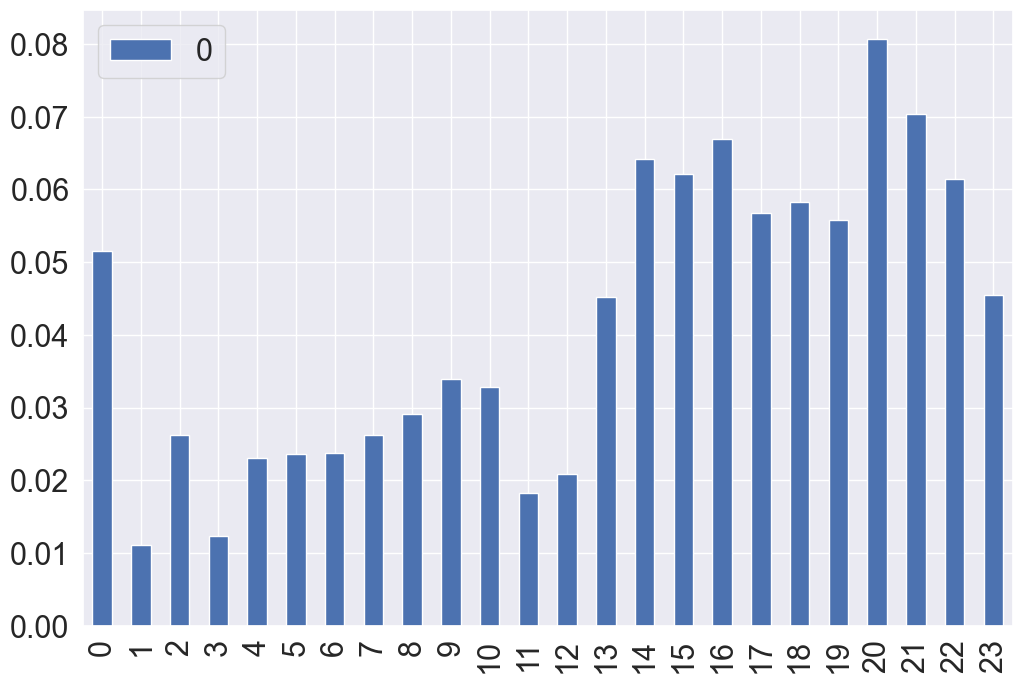

In [770]:
pd.DataFrame(rf.feature_importances_).plot.bar(figsize=(12, 8))

## 3. La régression linéaire

In [771]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

In [772]:
# modèles

polynomial_features= PolynomialFeatures(degree=3)
X_train_poly = polynomial_features.fit_transform(X_train)
X_test_poly = polynomial_features.fit_transform(X_test)

In [773]:
linreg = LinearRegression()
linreg.fit(X_train_poly, y_train)

LinearRegression()

In [774]:
y_train_predict = linreg.predict(X_train_poly)
y_test_predict = linreg.predict(X_test_poly)

mse_train = mean_squared_error(y_train, y_train_predict)
rmse_train = (np.sqrt(mse_train))
r2_train = r2_score(y_train, y_train_predict)


mse_test = mean_squared_error(y_test, y_test_predict)
rmse_test = (np.sqrt(mse_test))
r2_test = r2_score(y_test, y_test_predict)

In [775]:
print('La performance du modèle sur la base dapprentissage')
print('--------------------------------------')
print('mse du train {}'.format(mse_train), ' et test {}'.format(mse_test))
print("L'erreur quadratique moyenne du train est {}".format(rmse_train), " et test est {}".format(rmse_test))
print('le score R2 du train est {}'.format(r2_train), ' et test est {}'.format(r2_test))
print('\n')

La performance du modèle sur la base dapprentissage
--------------------------------------
mse du train 0.4605580459052238  et test 20007300621374.78
L'erreur quadratique moyenne du train est 0.6786442705167589  et test est 4472952.114809053
le score R2 du train est 0.4502068043844665  et test est -24312957230152.04




## 4. Forêt aléatoire régression

In [779]:
from sklearn.ensemble import RandomForestRegressor

rfg = RandomForestRegressor(max_depth=2, random_state=0)
# Entrainement du modèle
rfg.fit(X_train, y_train)
# Evaluation
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, rfg.predict(X_test)))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, rfg.predict(X_test)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, rfg.predict(X_test))))

Mean Absolute Error: 0.6664100355216521
Mean Squared Error: 0.6486235044698654
Root Mean Squared Error: 0.8053716561127945


## 5. Arbre de décision régression

In [780]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
# Entrainement du modèle
dt.fit(X_train, y_train)
# Evaluation
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, dt.predict(X_test)))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, dt.predict(X_test)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, dt.predict(X_test))))

Mean Absolute Error: 0.7773617870959689
Mean Squared Error: 1.1672490536211988
Root Mean Squared Error: 1.080393008872789


# Prédiction

In [776]:
# Création de la fonction
def appli(model, Pregnancies = 2, Glucose = 100, BloodPressure = 60, 
          SkinThickness = 30, Insulin = 0,
                BMI = 25, DiabetesPedigreeFunction = 0.5, Age = 40):
  x = np.array([Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin,
                BMI, DiabetesPedigreeFunction, Age]).reshape(1, 8)
  print(model.predict(x))
  print(model.predict_proba(x))

In [777]:
appli(dt,Pregnancies = 1, Glucose = 120, BloodPressure = 70, 
          SkinThickness = 10, Insulin = 2,
                BMI = 35, DiabetesPedigreeFunction = 0.2, Age = 25)

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


ValueError: X has 8 features, but DecisionTreeClassifier is expecting 24 features as input.

## Application aux différents modèles

In [ ]:
appli(rf)

In [ ]:
appli(knn)

In [ ]:
appli(linreg)

In [ ]:
appli(rfg)

In [ ]:
appli(dt)

## Score d'appétence 

In [ ]:
rf.predict_proba(X_test)

In [ ]:
knn.predict_proba(X_test)

In [ ]:
linreg.predict_proba(X_test)

In [ ]:
rfg.predict_proba(X_test)

In [ ]:
dt.predict_proba(X_test)